In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from googleapiclient.discovery import build
import os

In [15]:
# Set up YouTube API client
import os
YOUTUBE_API_KEY = os.getenv('YOUTUBE_API_KEY')

api_key = 'YOUTUBE_API_KEY'  # Replace with your actual API key
youtube = build('youtube', 'v3', developerKey=api_key)

# Function to search for YouTube channels and handle pagination
def search_channels(query, max_results=100):
    results = []
    request = youtube.search().list(
        q=query,
        part='snippet',
        type='channel',
        maxResults=50  # Max results per page
    )

    # Paginate through the results
    while request and len(results) < max_results:
        response = request.execute()
        results.extend(response['items'])

        # Check if there's another page of results
        if 'nextPageToken' in response:
            request = youtube.search().list(
                q=query,
                part='snippet',
                type='channel',
                maxResults=50,
                pageToken=response['nextPageToken']
            )
        else:
            break

    return results

# Search for channels related to Kenya (retrieving up to 100 channels)
search_results = search_channels('Kenya', max_results=100)

# Loop through the search results and print channel titles and IDs
for item in search_results:
    title = item['snippet']['title']
    channel_id = item['id']['channelId']
    print(f'Title: {title}, Channel ID: {channel_id}')

Title: Betty's Stories From Kenya(Истории Бетти из Кении), Channel ID: UCn0gL0gaCE9Moxe0UFIruzw
Title: Parliament of Kenya, Channel ID: UCXuseB7juWB7DIgTJcwtHFQ
Title: Citizen TV Kenya, Channel ID: UChBQgieUidXV1CmDxSdRm3g
Title: State House Kenya, Channel ID: UCuNsouEfEq9Sh6tapfg4uRA
Title: Yeah Kenyan, Channel ID: UCdLs3biL72hwXuZkz7I1YmA
Title: KTN News Kenya, Channel ID: UCKVsdeoHExltrWMuK0hOWmg
Title: twinshangout kenya, Channel ID: UCR3vMYVjtOA9vg_gLnjU9Aw
Title: Edu TV Kenya, Channel ID: UCByj0XrDmb0UDUui63EOnhA
Title: Optiven Kenya, Channel ID: UCyxOcDq3XKPZLqqW_pSAnwQ
Title: Salim Daawah Kenya  TV, Channel ID: UCM1ZegJI5YHUK_1M09Pmg5Q
Title: Evans From Kenya, Channel ID: UCFFImqk3FPSvKWBoturxJ7g
Title: Kenya Vision 2030, Channel ID: UCzffoFIki_WRPhXm6s_EN1g
Title: YUSUF DA-WAA KENYA 0728830597,0736253243Whassapp, Channel ID: UChMRshQlBp-GveMwb-iSqgQ
Title: Kenya Saiz, Channel ID: UCg8aZwcFw82LZadefbcbgPA
Title: Hope Channel Kenya, Channel ID: UC-ugP6AcvKwiO8gs5BnEXkA
Title: Fo

In [16]:
# Fuctions to retrieve channels kenya statistcs
def get_channel_stats(youtube, channel_ids):
  stat=[]

  # Split channel IDs into smaller chunks
  chunk_size = 50  # Number of IDs per request
  for i in range(0, len(channel_ids), chunk_size):
    chunk = channel_ids[i:i + chunk_size]
    request = youtube.channels().list(
      part="snippet,contentDetails,statistics",
      id=','.join(chunk) # Use the chunk of IDs
    )
    response = request.execute()

    # Extract the statistics and append to the list
    for item in response['items']:
      data = {'channelName': item['snippet']['title'],
  'subscribers': int(item['statistics']['subscriberCount']),
              'views': int(item['statistics']['viewCount']),
              'totalVideos': int(item['statistics']['videoCount']),
              'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
              }
      stat.append(data)
  return (pd.DataFrame(stat))

# Retrieve channel IDs from the search results
search_results = search_channels('Kenya', max_results=100) # Call search_channels to get results
channel_ids = [item['id']['channelId'] for item in search_results] # Extract channel IDs, iterate directly over search_results

# Call the fuction
channel_stats = get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Kenya M.,2550,162729,279,UU0kN7Pa0RdmE6b7I5D_buzA
1,CHRISTIAN ROHO CHURCH OF KENYA,442,114808,164,UUJ9K3QxF3ZAx5A2baUfx3Sw
2,AA Kenya,3780,201993,76,UUulxPgZoPJXgmXVTam9suPg
3,KENYA News MEDIA,127000,36283241,19068,UUNukoCRcXX1RVVswX36-R9A
4,Kilimall Kenya,8940,34005069,1233,UUiULdy56ABvBc8IAlFqiPSw
...,...,...,...,...,...
95,"Abass Online Tv, Daawa Kenya",9100,1680162,618,UUxWhENTEjUSvsUjsN6hQHRg
96,Kenya Online Media,786000,154405041,2821,UUcBNWxvAXH-nTAzOeuuLHgw
97,HARRY KENYA,10000,1011662,43,UUeAr5zZAVVw9kgjM4qmeGaw
98,Ashleys Kenya,1100,175886,70,UUbRU-4zqeT8KyhqzoxfamiQ


In [32]:
# Step 1: Calculate ranks
channel_stats['subscriberRank'] = channel_stats['subscribers'].rank(ascending=False)
channel_stats['viewRank'] = channel_stats['views'].rank(ascending=False)
channel_stats['videoRank'] = channel_stats['totalVideos'].rank(ascending=False)

# Step 2: Calculate averages
average_subscribers = channel_stats['subscribers'].mean()
average_views = channel_stats['views'].mean()
average_videos = channel_stats['totalVideos'].mean()

# Step 3: Identify the most-watched channel
most_watched_channel = channel_stats[channel_stats['views'] == channel_stats['views'].max()]

# Step 4: Answering key questions
print("1. Which channels are in the top rank based on subscribers?")
print(channel_stats.sort_values('subscriberRank').head(5))

print("\n2. Which channels are in the top rank based on views?")
print(channel_stats.sort_values('viewRank').head(5))

print("\n3. Which channels have the most videos?")
print(channel_stats.sort_values('videoRank').head(5))

print("\n4. What is the average number of subscribers across these channels?")
print(f"Average Subscribers: {average_subscribers}")

print("\n5. What is the average number of views across these channels?")
print(f"Average Views: {average_views}")

print("\n6. What is the average number of videos across these channels?")
print(f"Average Videos: {average_videos}")

print("\n7. Which channel is the most watched?")
print(most_watched_channel[['channelName', 'views']])

# Save the DataFrame to CSV for further analysis
channel_stats.to_csv('kenya_channels.csv', index=False)

1. Which channels are in the top rank based on subscribers?
            channelName  subscribers       views  totalVideos  \
25     Citizen TV Kenya      5180000  2089424314       178677   
41       KTN News Kenya      2890000   822099576       151520   
60  Tuko / Tuco - Kenya      1080000   230622395         1850   
96   Kenya Online Media       786000   154405041         2821   
93    New Life TV KENYA       583000   104841353         2666   

                  playlistId  subscriberRank  viewRank  videoRank  
25  UUhBQgieUidXV1CmDxSdRm3g             1.0       1.0        1.0  
41  UUKVsdeoHExltrWMuK0hOWmg             2.0       2.0        2.0  
60  UUl6ICaB9meBcSMQ5Zmr446g             3.0       3.0       15.0  
96  UUcBNWxvAXH-nTAzOeuuLHgw             4.0       4.0       12.0  
93  UUk3buHLJP6KAcbtsw8fj4hg             5.0       5.0       13.0  

2. Which channels are in the top rank based on views?
            channelName  subscribers       views  totalVideos  \
25     Citizen TV Ken

**EDA**

In [17]:
# Checking for statistical analysis
channel_stats.describe()

,subscribers,views,totalVideos
count,1.000000e+02,1.000000e+02,100.000000
mean,1.498463e+05,4.008501e+07,4961.080000
std,6.052502e+05,2.245099e+08,23577.335024
min,0.000000e+00,0.000000e+00,2.000000
25%,2.272500e+03,1.978825e+05,79.750000
50%,9.240000e+03,1.599116e+06,294.500000
75%,4.552500e+04,7.221958e+06,888.500000
max,5.180000e+06,2.089424e+09,178677.000000


In [18]:
# Checking fo nulls
channel_stats.isnull().sum()

,0
channelName,0
subscribers,0
views,0
totalVideos,0
playlistId,0


In [19]:
# Checking for datatype
channel_stats.dtypes

,0
channelName,object
subscribers,int64
views,int64
totalVideos,int64
playlistId,object


In [20]:
# Checking for categorical and non_categorical comlumns
categorical_columns = channel_stats.select_dtypes(include=['object']).columns
non_categorical_columns = channel_stats.select_dtypes(exclude=['object']).columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['channelName', 'playlistId'], dtype='object')

Non-Categorical Columns:
Index(['subscribers', 'views', 'totalVideos'], dtype='object')


In [21]:
# Checking for duplicates
channel_stats.duplicated().sum()

5

In [22]:
# Removing duplicates
channel_stats.drop_duplicates(inplace=True)
channel_stats.duplicated().sum()

0

In [23]:
# Checking shape for rows and columns
channel_stats.shape

(95, 5)

subscribers    14
views          13
totalVideos    14
dtype: int64


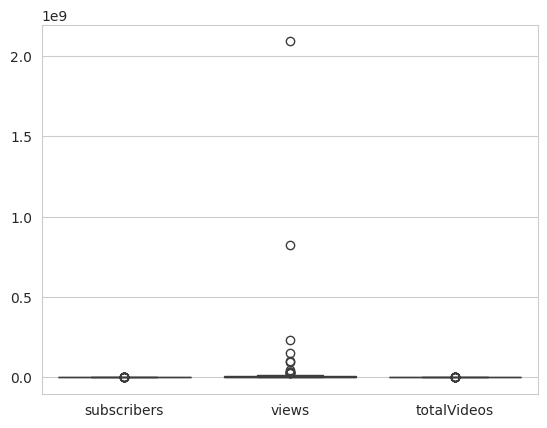

In [24]:
# Checking for outliers Non-Categorical Columns using IQR
IQR = channel_stats[non_categorical_columns].quantile(0.75) - channel_stats[non_categorical_columns].quantile(0.25)
UL = channel_stats[non_categorical_columns].quantile(0.75) + (1.5 * IQR)
LL = channel_stats[non_categorical_columns].quantile(0.25) - (1.5 * IQR)
outliers = (channel_stats[non_categorical_columns] < LL) | (channel_stats[non_categorical_columns] > UL)
print(outliers.sum())

# Checking outliers
sns.boxplot(data=channel_stats)
plt.show()

**VISUALIZATION**

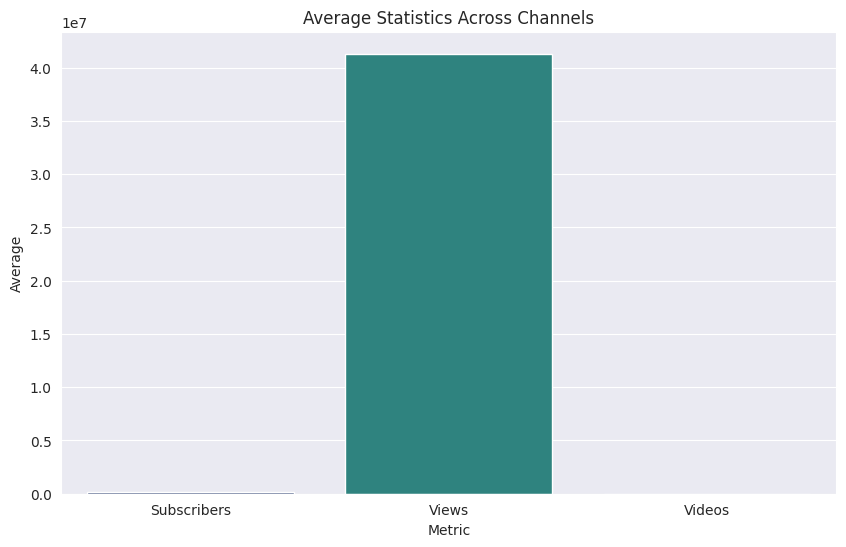

In [33]:
avg_subscribers = channel_stats['subscribers'].mean()
avg_views = channel_stats['views'].mean()
avg_videos = channel_stats['totalVideos'].mean()

avg_data = pd.DataFrame({
    'Metric': ['Subscribers', 'Views', 'Videos'],
    'Average': [avg_subscribers, avg_views, avg_videos]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', data=avg_data, palette='viridis')
plt.title('Average Statistics Across Channels')
plt.xlabel('Metric')
plt.ylabel('Average')
plt.show()

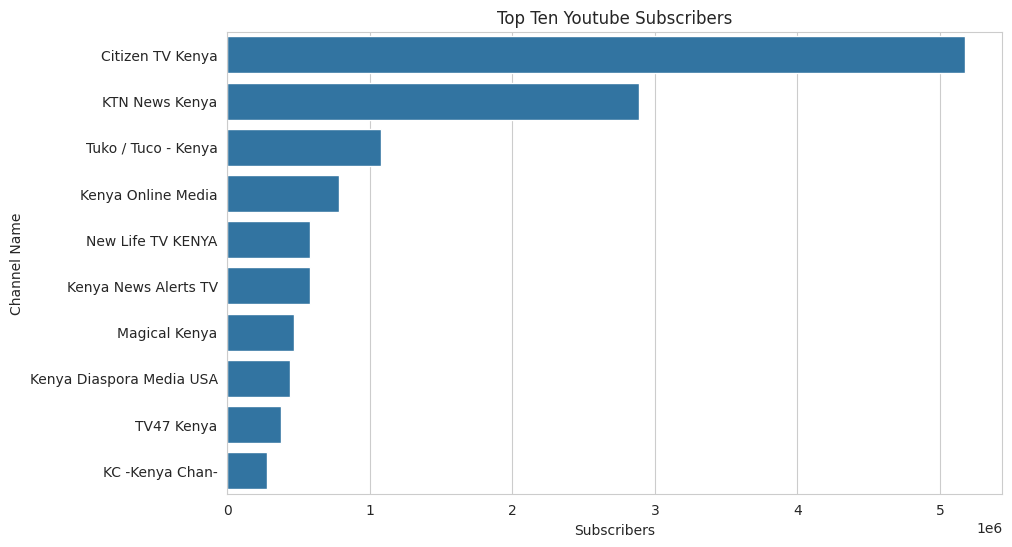

In [25]:
# Barchart Show top ten youtube subscribes
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='subscribers', y='channelName', data=channel_stats.sort_values('subscribers', ascending=False)[:10])
plt.xlabel('Subscribers')
plt.ylabel('Channel Name')
plt.title('Top Ten Youtube Subscribers')
plt.show()

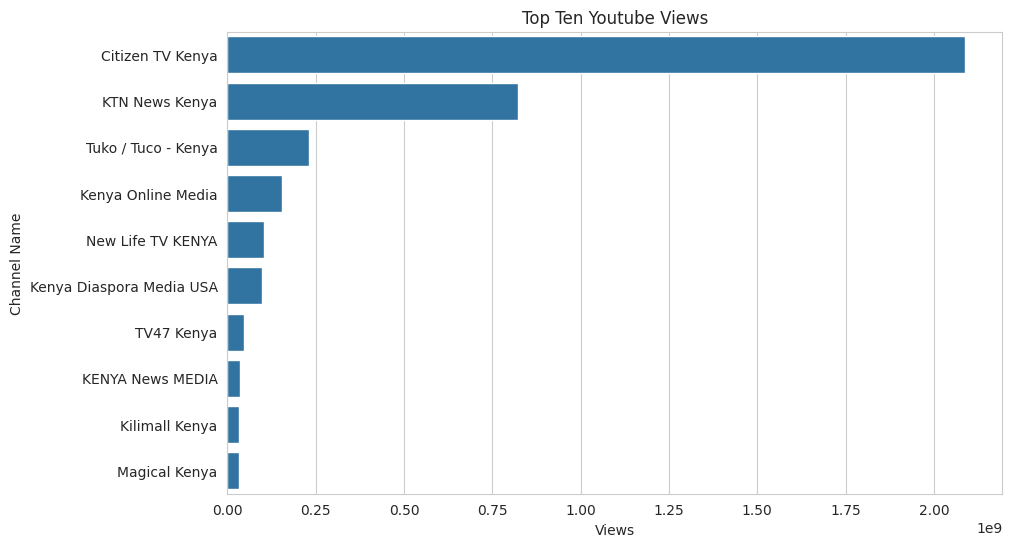

In [26]:
# Checking for Barchart TO 10 views
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='channelName', data=channel_stats.sort_values('views', ascending=False)[:10])
plt.xlabel('Views')
plt.ylabel('Channel Name')
plt.title('Top Ten Youtube Views')
plt.show()


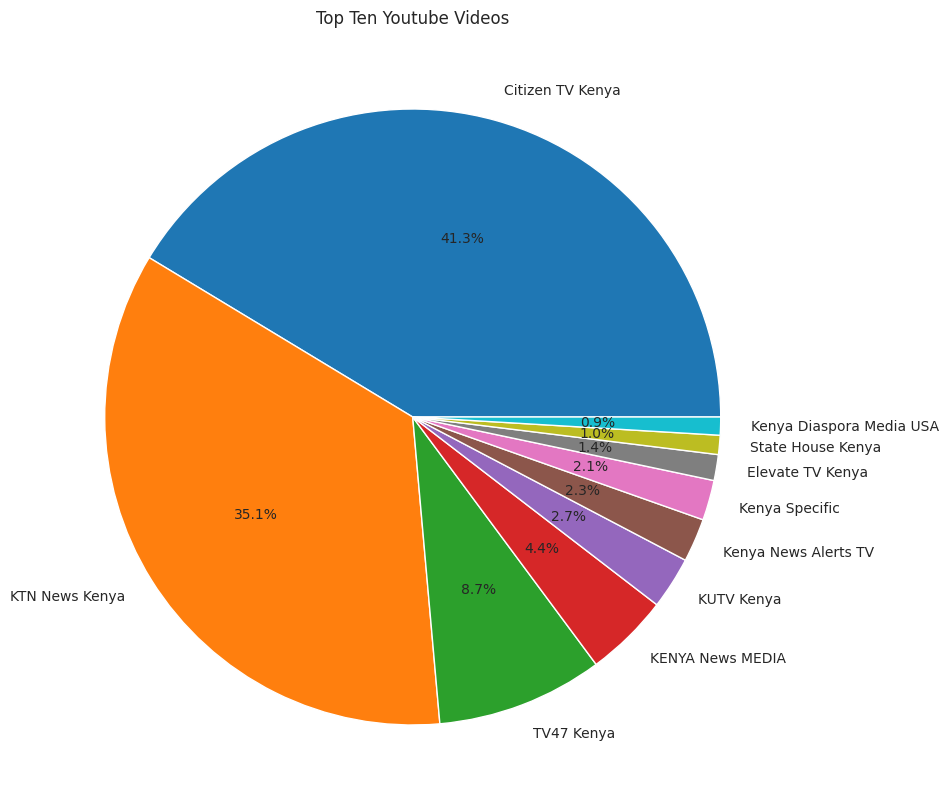

In [27]:
# Checking for piechart for top 10 totalVideos
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
plt.pie(channel_stats.sort_values('totalVideos', ascending=False)['totalVideos'][:10], labels=channel_stats.sort_values('totalVideos', ascending=False)['channelName'][:10], autopct='%1.1f%%')
plt.title('Top Ten Youtube Videos')
plt.show()

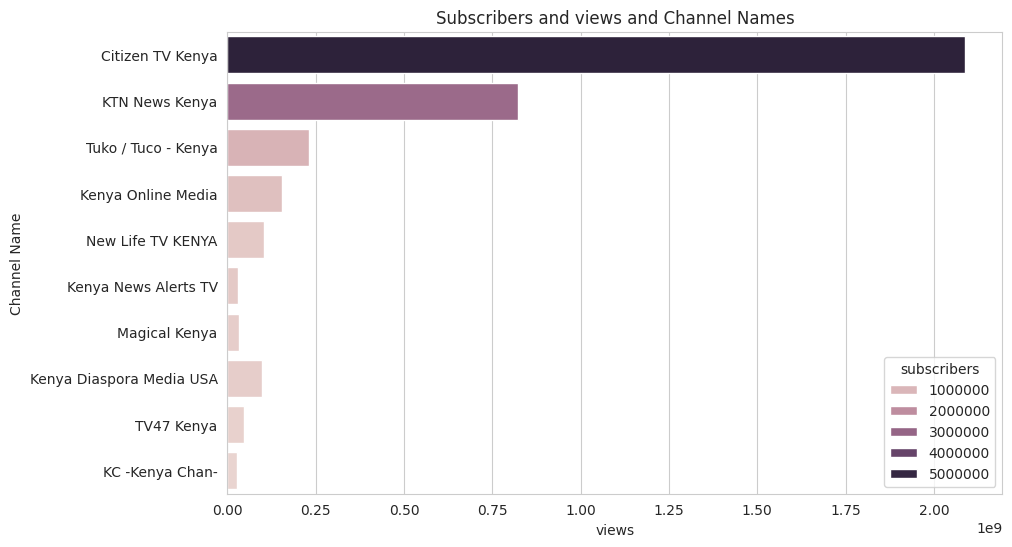

In [28]:
# Checking for barchart subscribers and views and channel names top 10 views
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='channelName', hue='subscribers', data=channel_stats.sort_values('subscribers', ascending=False)[:10])
plt.ylabel('Channel Name')
plt.title('Subscribers and views and Channel Names')
plt.show()

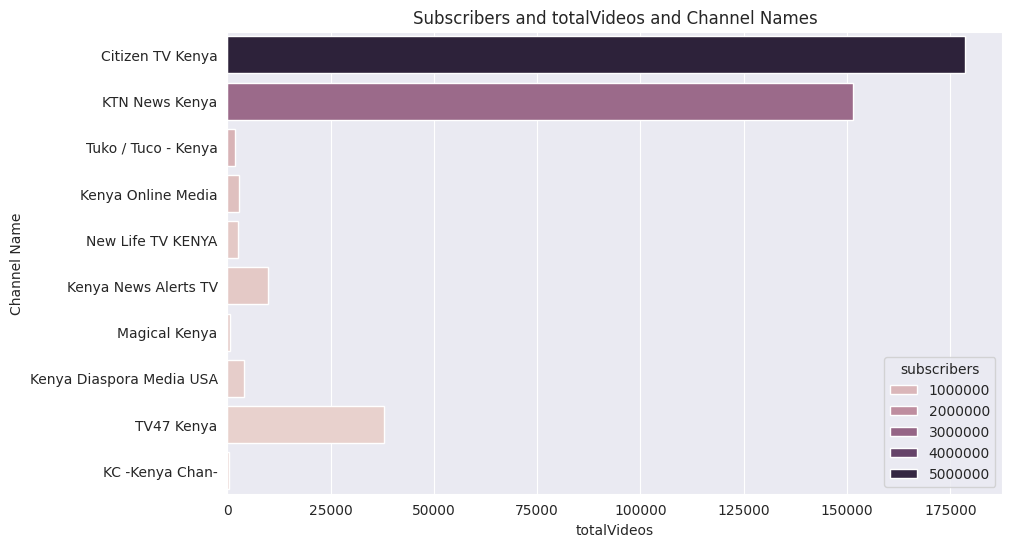

In [29]:
# Checking for barchart subscribers and totalVideos and channel names top 10 views
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='totalVideos', y='channelName', hue='subscribers', data=channel_stats.sort_values('subscribers', ascending=False)[:10])
plt.ylabel('Channel Name')
plt.title('Subscribers and totalVideos and Channel Names')
plt.show()

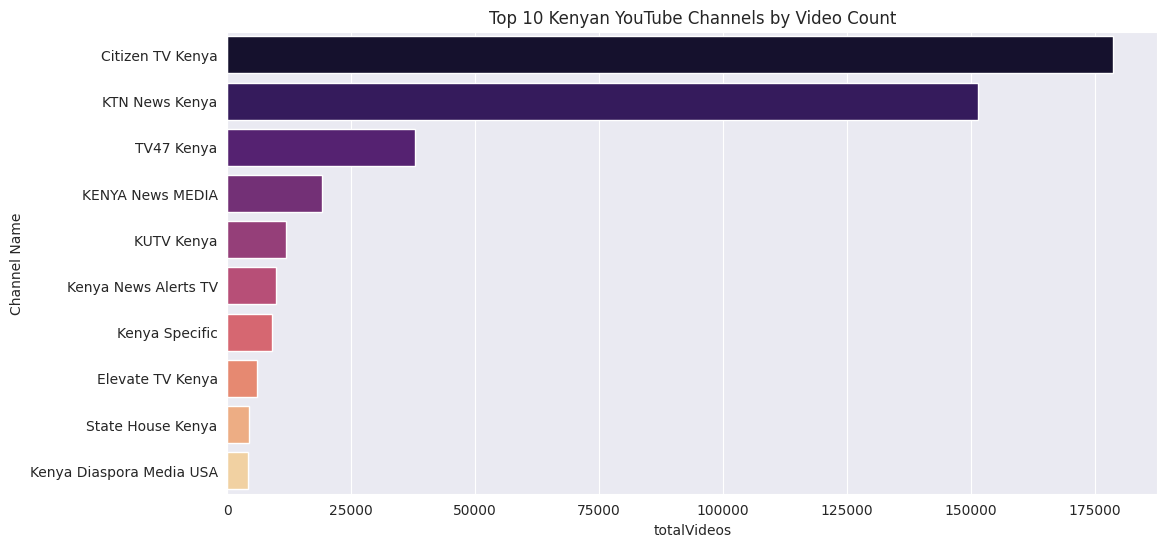

In [31]:
# Sorting by video count
top_videos = channel_stats.sort_values('totalVideos', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='totalVideos', y='channelName', data=top_videos, palette='magma')
plt.title('Top 10 Kenyan YouTube Channels by Video Count')
plt.xlabel('totalVideos')
plt.ylabel('Channel Name')
plt.show()

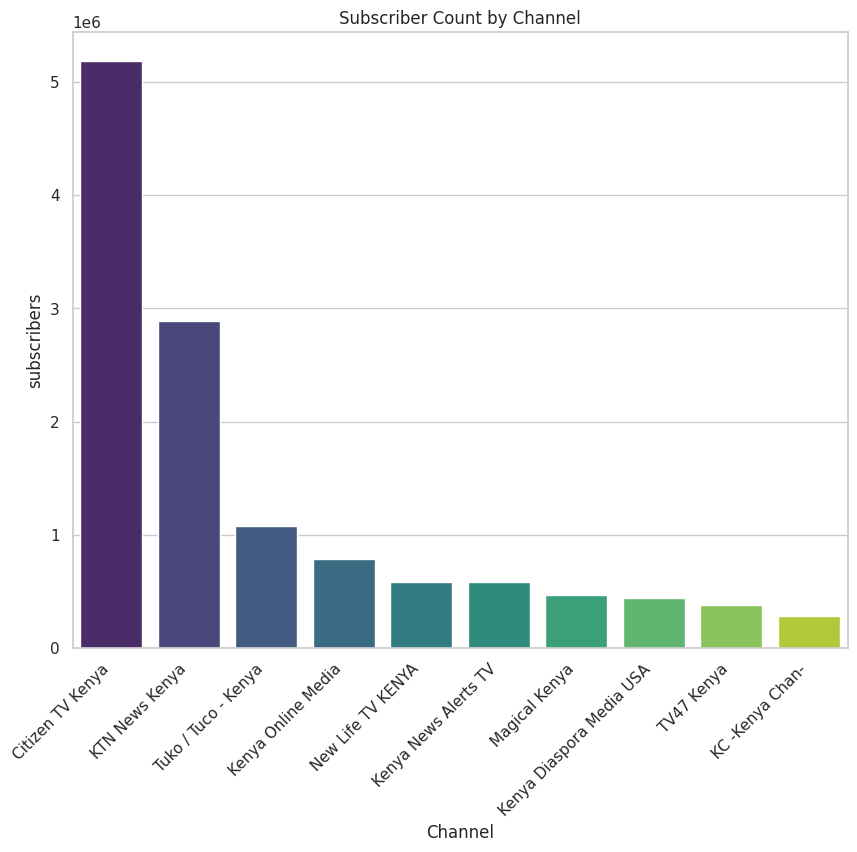

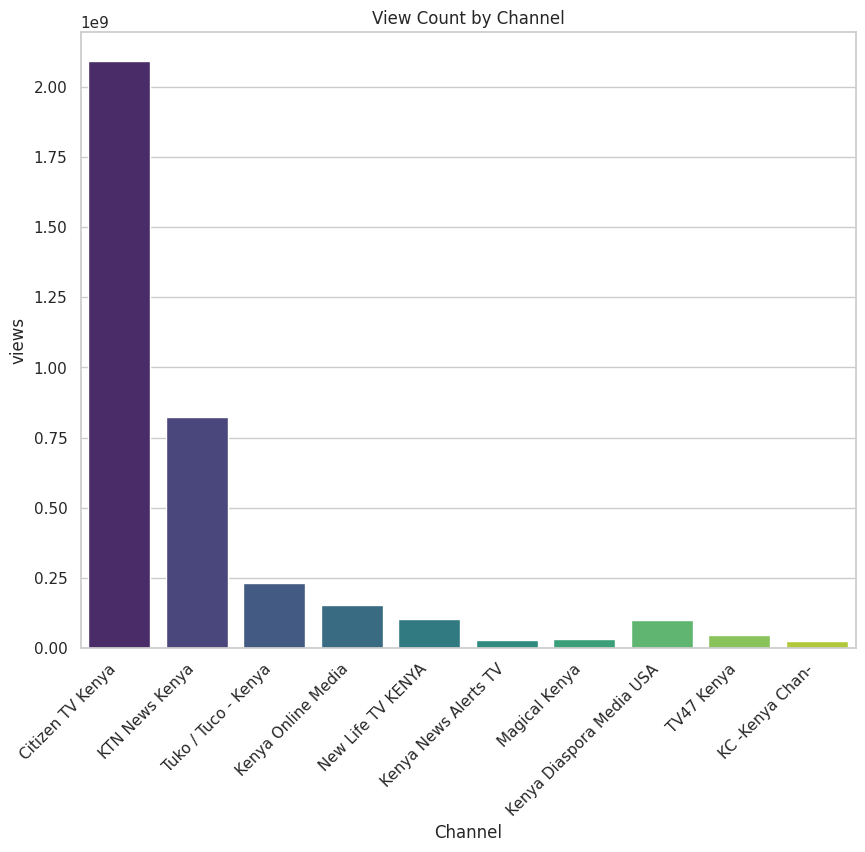

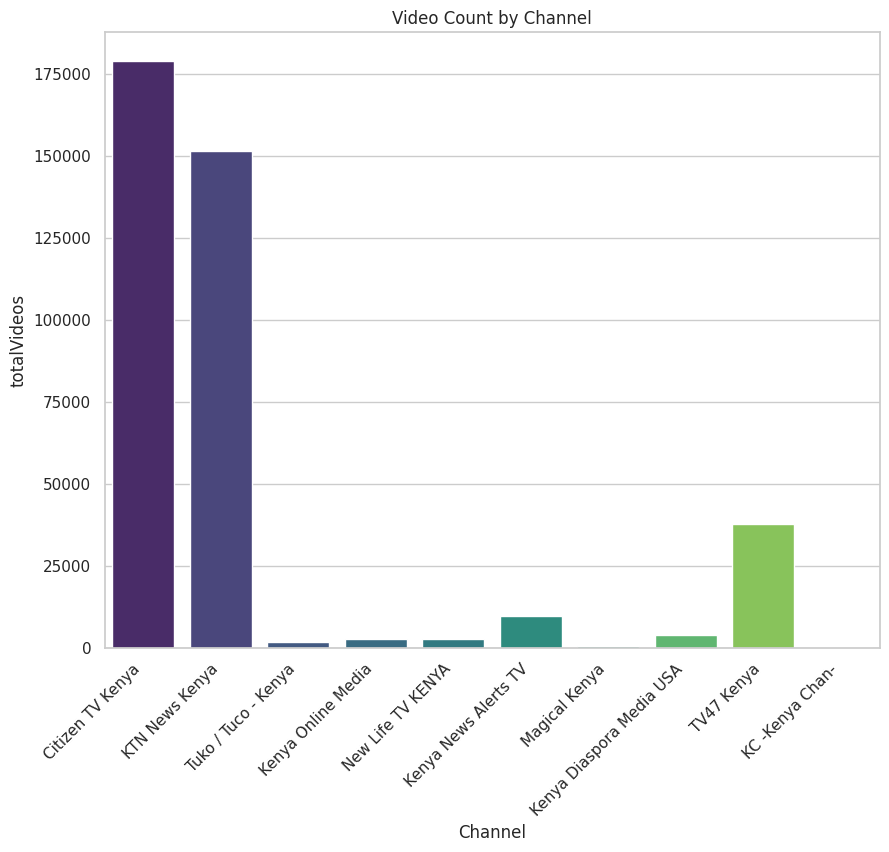

In [35]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot subscribers
plt.figure(figsize=(10,8))
sns.barplot(x='channelName', y='subscribers', data=channel_stats.sort_values('subscribers', ascending=False)[:10], palette='viridis') # Removed the call to 'viridis' and added sorting to the data argument.
plt.xticks(rotation=45, ha='right')
plt.title('Subscriber Count by Channel')
plt.xlabel('Channel')
plt.ylabel('subscribers')
plt.show()

# Plot views
plt.figure(figsize=(10,8))
sns.barplot(x='channelName', y='views', data=channel_stats.sort_values('subscribers', ascending=False)[:10], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('View Count by Channel')
plt.xlabel('Channel')
plt.ylabel('views')
plt.show()

# Plot totalVideos
plt.figure(figsize=(10,8))
sns.barplot(x='channelName', y='totalVideos', data=channel_stats.sort_values('subscribers', ascending=False)[:10], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Video Count by Channel')
plt.xlabel('Channel')
plt.ylabel('totalVideos')
plt.show()

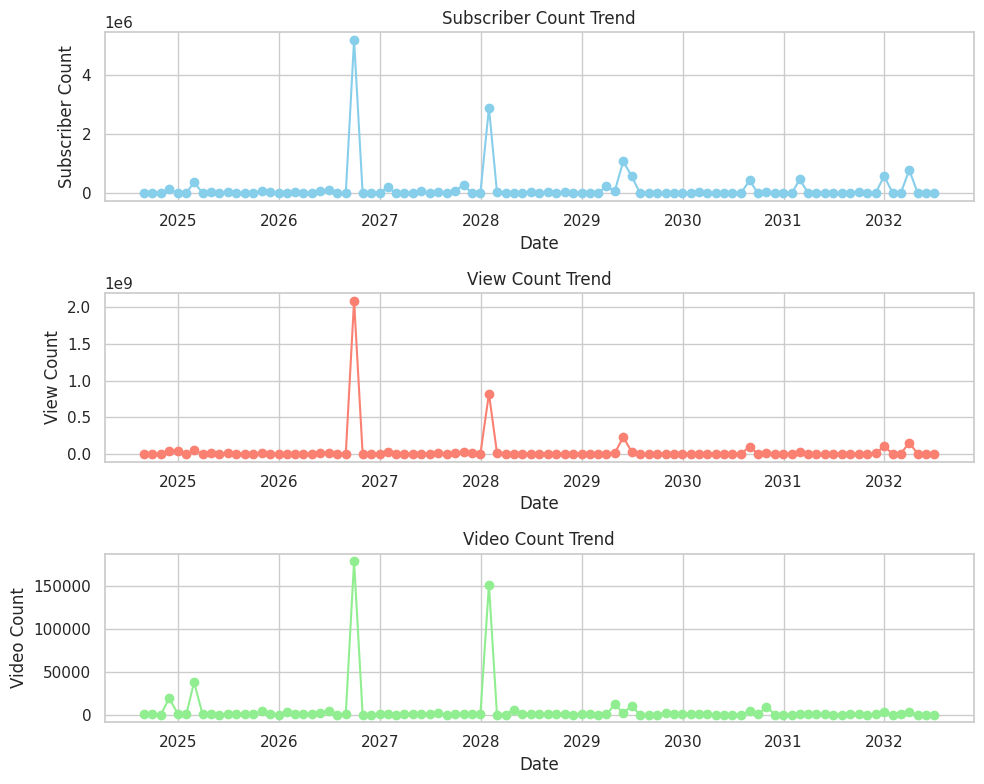

In [37]:
# Generate synthetic date column
start_date = '2024-08-30'  # Starting date
date_range = pd.date_range(start=start_date, periods=len(channel_stats), freq='M')
channel_stats['date'] = date_range

# Set 'date' as the index
channel_stats.set_index('date', inplace=True)
# Plot trends
fig, axes = plt.subplots(3, 1, figsize=(10,8))

# Plot subscriber count trend
axes[0].plot(channel_stats.index, channel_stats['subscribers'], marker='o', color='skyblue')
axes[0].set_title('Subscriber Count Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Subscriber Count')
axes[0].grid(True)

# Plot view count trend
axes[1].plot(channel_stats.index, channel_stats['views'], marker='o', color='salmon')
axes[1].set_title('View Count Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('View Count')
axes[1].grid(True)

# Plot video count trend
axes[2].plot(channel_stats.index, channel_stats['totalVideos'], marker='o', color='lightgreen')
axes[2].set_title('Video Count Trend')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Video Count')
axes[2].grid(True)

plt.tight_layout()
plt.show()